In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random, math,sys
from sklearn.datasets import make_blobs

In [2]:
def generate_dataset(sigma,mu,n_samples):
    X,y = make_blobs(n_samples, centers=mu, n_features=2, cluster_std=sigma)
    return X,y

def affichage(X,y):
    plt.scatter(X[:,0],X[:,1],c=y)
    abs = np.arange(-1,1,0.01)
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    plt.show(block=False)

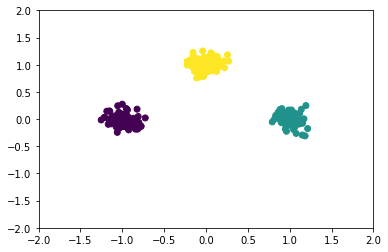

In [3]:
sigma = 0.10
mu = [[-1,0],[1,0],[0,1]]
n_samples = 300
X,y = generate_dataset(sigma,mu,n_samples)
affichage(X,y)

In [4]:
def distance(x1,x2):
    return np.sqrt((x2[0]-x1[0])**2 + (x2[1]-x1[1])**2)

In [5]:
def sort_distance(x,S):
  dist = []
  for i in range(len(S)) :
    dist.append([i,distance(x,S[i])])
  # Tri 
  for i in range(1, len(dist)): 
        k = dist[i] 
        j = i-1
        while j >= 0 and k[1] < dist[j][1] : 
                dist[j + 1] = dist[j] 
                j -= 1
        dist[j + 1] = k
  return dist

print(sort_distance(X[100],X))

[[100, 0.0], [42, 0.002162476034803587], [204, 0.009151130560347479], [113, 0.014701077426410932], [255, 0.016695100854998996], [59, 0.018799196318288004], [240, 0.029237856091827052], [91, 0.050761316785748814], [191, 0.05363637075978994], [60, 0.054366759562966764], [208, 0.054699000952843045], [235, 0.05517175558333499], [147, 0.05555980339666467], [137, 0.05561259091168284], [234, 0.06287821747810968], [23, 0.06416370441026308], [172, 0.06433065947070482], [173, 0.06682403328359679], [126, 0.06967092851431295], [219, 0.08162639104595003], [12, 0.08217301121197991], [154, 0.08360710402060308], [4, 0.0840088983901415], [85, 0.08516035750759356], [127, 0.08530894086184443], [225, 0.08658007665321908], [167, 0.09292882993393099], [145, 0.09293401172801058], [6, 0.09620452854114286], [233, 0.09780297652361065], [58, 0.09857778724623963], [205, 0.09984223641241309], [37, 0.10065143626060977], [265, 0.10111679994530336], [194, 0.10293146628103174], [96, 0.1064073814572772], [281, 0.107111

In [10]:
def kNN_index(X,x,k):
    Sk = []
    Rk = []
    distances = sort_distance(x,X)
    for i in range(k):
        ri = distances[i][0]
        Rk.append(ri)
    return Rk

print(kNN_index(X,X[45],5))
        

[45, 213, 67, 51, 221]


In [11]:
def compute_fk(X,x,y,k):
    yr = [0,0,0]
    index = kNN_index(X,x,k)
    for i in range(k):
        yr[y[index[i]]] += 1
    yr = np.array(yr)
    y = np.argmax(yr)
    print(y)

compute_fk(X,X[56],y,5)

1


In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)



200
100
